# Importing important library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


#Loading Data set

In [ ]:
df = pd.read_csv("fraudTrain.csv")
print(df.shape)
df.head(20)

(11706, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1.325376e+09,40.653382,-76.152667,0.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1.325376e+09,37.162705,-100.153370,0.0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1.325376e+09,38.948089,-78.540296,0.0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1.325376e+09,40.351813,-79.958146,0.0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1.325376e+09,37.179198,-87.485381,0.0


#Dropping unnecessary column

In [ ]:
df.drop(columns=['trans_date_trans_time', 'cc_num', 'first', 'last', 'street',
                 'city', 'state', 'zip', 'dob', 'trans_num', 'unix_time'], inplace=True)


# Using of  LabelEncoder

In [ ]:
categorical_cols = ['merchant', 'category', 'gender', 'job']
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']


In [ ]:
# Step 1: Combine X and y to ensure rows are aligned
data = pd.concat([X, y], axis=1)

# Step 2: Drop rows where y (label) is NaN
data = data.dropna(subset=[y.name])

# Step 3: Separate again
X = data.drop(columns=[y.name])
y = data[y.name]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9961554891072192
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2331
         1.0       0.67      0.20      0.31        10

    accuracy                           1.00      2341
   macro avg       0.83      0.60      0.65      2341
weighted avg       1.00      1.00      1.00      2341



#DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9953011533532679
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2331
         1.0       0.47      0.90      0.62        10

    accuracy                           1.00      2341
   macro avg       0.74      0.95      0.81      2341
weighted avg       1.00      1.00      1.00      2341



#RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9991456642460487
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2331
         1.0       1.00      0.80      0.89        10

    accuracy                           1.00      2341
   macro avg       1.00      0.90      0.94      2341
weighted avg       1.00      1.00      1.00      2341



# Confusion Matrix

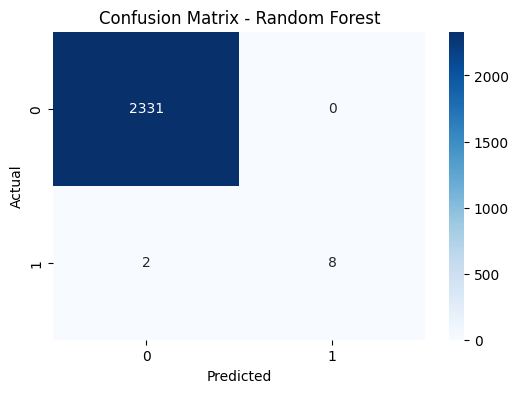

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Model Comparison

In [ ]:
# Store results
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Sort models by accuracy
results_df = results_df.sort_values("Accuracy", ascending=False)

# Display the results
print("\n🔍 Model Comparison:")
print(results_df)



🔍 Model Comparison:
                 Model  Accuracy
2        Random Forest  0.999146
0  Logistic Regression  0.996155
1        Decision Tree  0.995301


# Save trained label encoders, scaler, and random forest model

In [ ]:
joblib.dump(label_encoders, "label_encoders.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(rf_model, "random_forest_model.joblib")

print("✅ Model, encoders, and scaler saved successfully!")


✅ Model, encoders, and scaler saved successfully!


# Drop unused columns

In [ ]:
fraud_test_df = pd.read_csv("fraudTest.csv")
cols_to_drop = ['trans_date_trans_time', 'cc_num', 'first', 'last', 'street',
                'city', 'state', 'zip', 'dob', 'trans_num', 'unix_time']
fraud_test_df.drop(columns=cols_to_drop, inplace=True)

# Load saved encoder, scaler, and model

In [ ]:
label_encoders = joblib.load("label_encoders.joblib")
scaler = joblib.load("scaler.joblib")
rf_model = joblib.load("random_forest_model.joblib")


# Fill missing categorical values

In [ ]:
categorical_cols = ['merchant', 'category', 'gender', 'job']
fraud_test_df[categorical_cols] = fraud_test_df[categorical_cols].fillna("Unknown")

# Encode categorical columns

In [ ]:
for col in categorical_cols:
    le = label_encoders[col]
    # Create a mapping of known classes
    class_map = {cls: idx for idx, cls in enumerate(le.classes_)}
    # Use map with fallback to -1 for unknown labels
    fraud_test_df[col] = fraud_test_df[col].map(class_map).fillna(-1).astype(int)

# Predict and File Saving

In [ ]:
# ✅ Drop rows with missing true labels BEFORE prediction and evaluation
fraud_test_df = fraud_test_df.dropna(subset=['is_fraud'])

# 🔹 Extract features and target again
X_fraud_test = fraud_test_df.drop(columns=['is_fraud'])
y_fraud_test = fraud_test_df['is_fraud']

# 🔹 Make sure the order of features matches training
X_fraud_test = X_fraud_test[X.columns]

# 🔹 Scale using the same scaler from training
X_fraud_test_scaled = scaler.transform(X_fraud_test)

# 🔹 Predict
y_pred_fraud = rf_model.predict(X_fraud_test_scaled)

# 🔹 Evaluate
print("✅ Random Forest Test Accuracy:", accuracy_score(y_fraud_test, y_pred_fraud))
print("\n📊 Classification Report:\n", classification_report(y_fraud_test, y_pred_fraud))

# 🔹 Save predictions
fraud_test_df['predicted_is_fraud'] = y_pred_fraud
fraud_test_df.to_csv("fraud_test_rf_predictions.csv", index=False)
print("\n📁 Predictions saved to 'fraud_test_rf_predictions.csv'")

✅ Random Forest Test Accuracy: 0.9959451707973179

📊 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50356
         1.0       0.00      0.00      0.00       201

    accuracy                           1.00     50557
   macro avg       0.50      0.50      0.50     50557
weighted avg       0.99      1.00      0.99     50557


📁 Predictions saved to 'fraud_test_rf_predictions.csv'
